In [1]:
# Add dependencies
# Import the random module.
import random
# Import the NumPy module - has a built-in random module and supplements 
# the built-in Python random module.
import numpy as np
# Import timeit - This test how long a piece of code or function takes to 
# run (complete).
import timeit
# Import Pandas
import pandas as pd
# Import matplotlib
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and datetime module from the datetime library.
import time 
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key, google_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

635

In [5]:
# Starting URL for Weather Map API Call. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Each time we reference the city in the code, we need to use the indexing
# on the cities list.  This will cause programming errors when building the
# city_url because it adds the index, not the city name, to the city_url.  
# to fix this issue, create another for loop to get the city from the cities
# list.  Instead of using 2 for loops, use the enumerate() method as an 
# alternative way to iterate through the list of cities and retrieve both
# the index, and the city from the list.  Syntax for the enumerate() 
# method is for i, item in enumerate(list):

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | samusu
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | yerbogachen
Processing Record 7 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 1 | praya
Processing Record 9 of Set 1 | alyangula
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | halalo
City not found. Skipping...
Processing Record 16 of Set 1 | fereydun kenar
Processing Record 17 of Set 1 | samarai
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | vao
Processi

Processing Record 36 of Set 4 | kuybyshevo
Processing Record 37 of Set 4 | gallup
Processing Record 38 of Set 4 | opuwo
Processing Record 39 of Set 4 | ballina
Processing Record 40 of Set 4 | aden
Processing Record 41 of Set 4 | codajas
Processing Record 42 of Set 4 | cartagena
Processing Record 43 of Set 4 | mandera
Processing Record 44 of Set 4 | namatanai
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | bilma
Processing Record 47 of Set 4 | beroroha
Processing Record 48 of Set 4 | yanan
City not found. Skipping...
Processing Record 49 of Set 4 | carnarvon
Processing Record 50 of Set 4 | arlit
Processing Record 1 of Set 5 | santa cruz
Processing Record 2 of Set 5 | teya
Processing Record 3 of Set 5 | xining
Processing Record 4 of Set 5 | vila
Processing Record 5 of Set 5 | brae
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | alofi
Processing Record 9 of Set 5 | springfield
Processing Record 10 of 

Processing Record 20 of Set 8 | sitka
Processing Record 21 of Set 8 | male
Processing Record 22 of Set 8 | port hedland
Processing Record 23 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 24 of Set 8 | auki
Processing Record 25 of Set 8 | gamba
Processing Record 26 of Set 8 | saint-pierre
Processing Record 27 of Set 8 | vaitape
Processing Record 28 of Set 8 | simao
Processing Record 29 of Set 8 | lodja
Processing Record 30 of Set 8 | ladispoli
Processing Record 31 of Set 8 | boli
Processing Record 32 of Set 8 | banepa
Processing Record 33 of Set 8 | bhopal
Processing Record 34 of Set 8 | pedasi
Processing Record 35 of Set 8 | nouadhibou
Processing Record 36 of Set 8 | ilulissat
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 8 | dauphin
Processing Record 40 of Set 8 | reconquista
Processing Record 41 of Set 8 | hammerfest
Processing Record 42 of Set 8 | xixiang
Processing

City not found. Skipping...
Processing Record 13 of Set 12 | jalu
Processing Record 14 of Set 12 | sulangan
Processing Record 15 of Set 12 | baykit
Processing Record 16 of Set 12 | lerwick
Processing Record 17 of Set 12 | taos
Processing Record 18 of Set 12 | sfantu gheorghe
Processing Record 19 of Set 12 | bay roberts
Processing Record 20 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 21 of Set 12 | vostok
Processing Record 22 of Set 12 | matay
Processing Record 23 of Set 12 | taoudenni
Processing Record 24 of Set 12 | puerto varas
Processing Record 25 of Set 12 | kahului
Processing Record 26 of Set 12 | muroto
Processing Record 27 of Set 12 | omsukchan
Processing Record 28 of Set 12 | visby
Processing Record 29 of Set 12 | terra santa
Processing Record 30 of Set 12 | andros town
Processing Record 31 of Set 12 | lixourion
Processing Record 32 of Set 12 | tabialan
City not found. Skipping...
Processing Record 33 of Set 12 | quesnel
Processing Record 34 of 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,1.63,85,100,3.44,CA,2022-04-10 00:50:37
1,Ushuaia,-54.8000,-68.3000,47.86,71,40,19.57,AR,2022-04-10 00:47:10
2,Jamestown,42.0970,-79.2353,35.19,46,75,6.91,US,2022-04-10 00:48:59
3,Mataura,-46.1927,168.8643,61.20,51,7,4.79,NZ,2022-04-10 00:50:38
4,Yerbogachen,61.2767,108.0108,23.47,86,14,8.88,RU,2022-04-10 00:50:38
5,Praya,14.9215,-23.5087,70.63,78,8,14.52,CV,2022-04-10 00:50:39
6,Alyangula,-13.8483,136.4192,87.67,62,100,3.44,AU,2022-04-10 00:50:39
7,Lata,40.1629,-8.3327,52.92,96,98,3.31,PT,2022-04-10 00:50:39
8,Katsuura,35.1333,140.3000,66.52,68,0,4.76,JP,2022-04-10 00:50:40
9,Saint-Joseph,-21.3667,55.6167,75.58,83,31,12.46,RE,2022-04-10 00:50:40


In [8]:
# Convert the order of the columns in the DataFrame to be in the following 
# order: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, & 
# Wind Speed.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]
# Assign city_data_df = city_data_df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2022-04-10 00:50:37,70.4692,-68.5914,1.63,85,100,3.44
1,Ushuaia,AR,2022-04-10 00:47:10,-54.8000,-68.3000,47.86,71,40,19.57
2,Jamestown,US,2022-04-10 00:48:59,42.0970,-79.2353,35.19,46,75,6.91
3,Mataura,NZ,2022-04-10 00:50:38,-46.1927,168.8643,61.20,51,7,4.79
4,Yerbogachen,RU,2022-04-10 00:50:38,61.2767,108.0108,23.47,86,14,8.88
5,Praya,CV,2022-04-10 00:50:39,14.9215,-23.5087,70.63,78,8,14.52
6,Alyangula,AU,2022-04-10 00:50:39,-13.8483,136.4192,87.67,62,100,3.44
7,Lata,PT,2022-04-10 00:50:39,40.1629,-8.3327,52.92,96,98,3.31
8,Katsuura,JP,2022-04-10 00:50:40,35.1333,140.3000,66.52,68,0,4.76
9,Saint-Joseph,RE,2022-04-10 00:50:40,-21.3667,55.6167,75.58,83,31,12.46


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

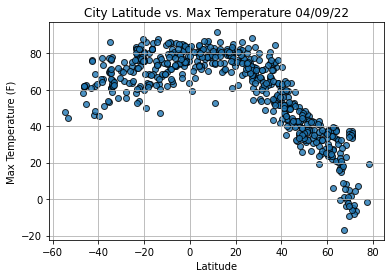

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

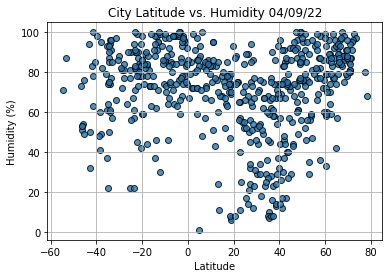

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

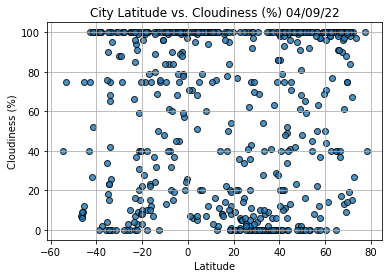

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

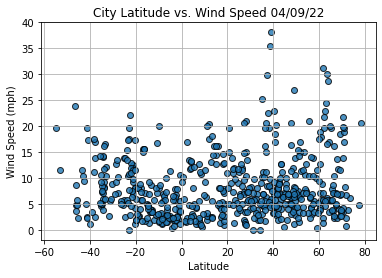

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on teh weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_vale, Std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from teh slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Add code to perform regression analysis on the maximum temperature in the
# Northern and Southern Hemispheres.  To do this create a Northern Hemisphere
# DataFrames from the city_data_df DataFrame using the Loc method.  The Loc 
# method accesses a group of rows and columns in eh current DataFrame by an 
# index, labels, or a Boolean array.  The syntax to get a specific row from 
# a current DataFrame is row = df.loc[row_index].

# Create a new DataFrame from a current DataFrame to perform regression 
# analysis on maximum temperatures in the Northern and Southern Hemispheres.
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2022-04-10 00:46:00
Lat                      -42.8794
Lng                      147.3294
Max Temp                    76.05
Humidity                       50
Cloudiness                     75
Wind Speed                  10.36
Name: 13, dtype: object

In [30]:
# To filter a DataFrame based on a value of a row.  If we wanted to get all 
# Northern Hemsphere latitudes, for latitudes greater than or equal to 0,
# filter the DataFrame, this will return either a True or False for all row
# that meet these criteria.

# Get all Northern Hemisphere latitudes greater than or equal to 0.
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
568     True
569     True
570     True
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [31]:
# to return a DataFrame with all data fitting the criteria, for lattitudes
# greater than or equal to 0 use the loc method on the DataFrame.  Inside 
# the brackets, add the conditional filter so the statement would appear as:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2022-04-10 00:50:37,70.4692,-68.5914,1.63,85,100,3.44
2,Jamestown,US,2022-04-10 00:48:59,42.0970,-79.2353,35.19,46,75,6.91
4,Yerbogachen,RU,2022-04-10 00:50:38,61.2767,108.0108,23.47,86,14,8.88
5,Praya,CV,2022-04-10 00:50:39,14.9215,-23.5087,70.63,78,8,14.52
7,Lata,PT,2022-04-10 00:50:39,40.1629,-8.3327,52.92,96,98,3.31
...,...,...,...,...,...,...,...,...,...
568,Mantua,IT,2022-04-10 01:06:15,45.1667,10.7833,43.05,86,71,5.01
569,Syamzha,RU,2022-04-10 01:06:16,60.0158,41.0614,35.96,97,100,9.46
570,Los Llanos De Aridane,ES,2022-04-10 01:06:16,28.6585,-17.9182,58.75,67,75,3.44
571,Asnaes,DK,2022-04-10 01:06:16,55.8123,11.5013,41.11,82,98,21.00


In [32]:
# Since this is a DataFrame, add the head() method to get the 1st 5 rows.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2022-04-10 00:50:37,70.4692,-68.5914,1.63,85,100,3.44
2,Jamestown,US,2022-04-10 00:48:59,42.0970,-79.2353,35.19,46,75,6.91
4,Yerbogachen,RU,2022-04-10 00:50:38,61.2767,108.0108,23.47,86,14,8.88
5,Praya,CV,2022-04-10 00:50:39,14.9215,-23.5087,70.63,78,8,14.52
7,Lata,PT,2022-04-10 00:50:39,40.1629,-8.3327,52.92,96,98,3.31


In [33]:
# Now assign this DataFrame to a variable to access the data to perform 
# linear regression.  Take the same approach with the cities for the 
# Southern Hemisphere by filtering the city_data_df DataFrames for latitudes
# less than 0.

# Create DataFrames for the Northern and Southern Hemispheres data.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

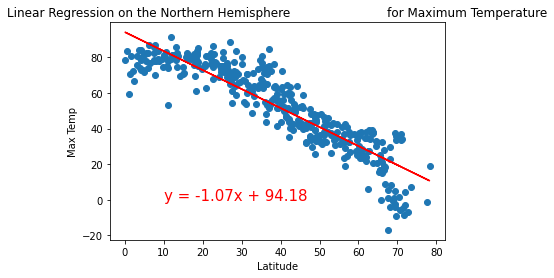

In [38]:
# To generate the linear regression on the maximum temperature for the 
# Northern Hemisphere, you'll need the x and y values.  set the x values 
# equal to the latitude column and the y values equal to the maximum 
# temperature column from the northern_hemi_df DataFrames.
# Latitude is the independent variable, Max Temp is the dependent variable.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

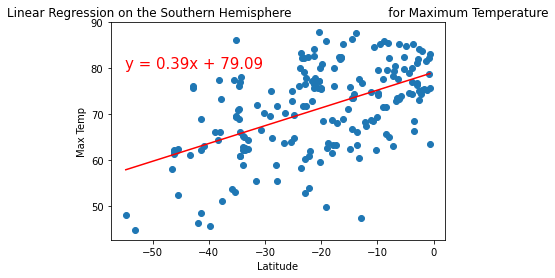

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

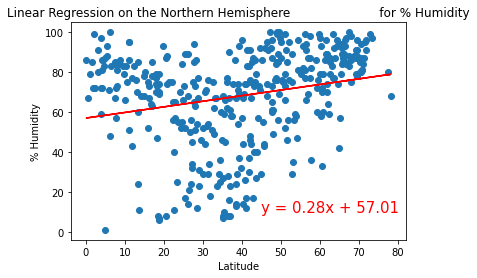

In [47]:
# Linear regression on the % Humidity for the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity', (45,10))

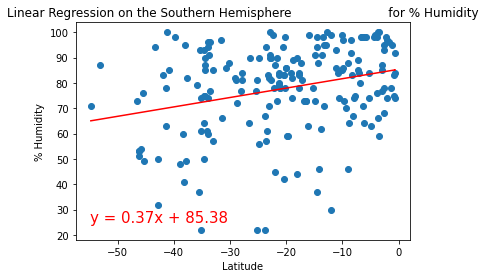

In [51]:
# Linear regression on the % Humidity for the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,25))

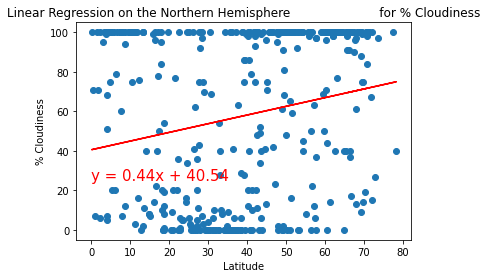

In [55]:
# Linear regression on the % Cloudiness for the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (0,25))

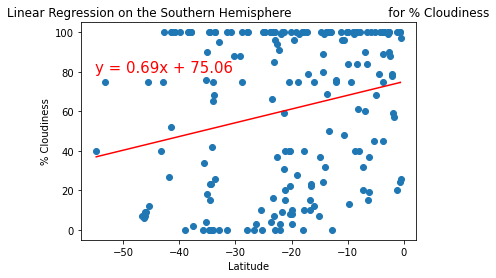

In [61]:
# Linear regression on the % Cloudiness for the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,80))

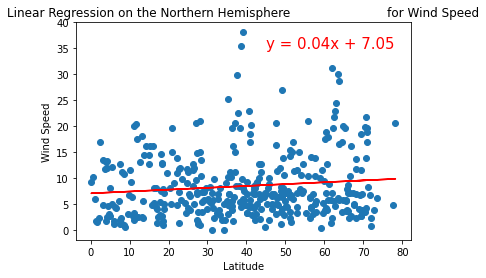

In [63]:
# Linear regression on Wind Speed for the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,35))

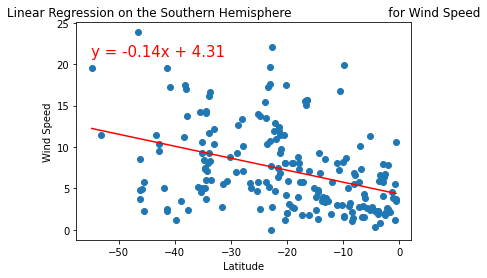

In [67]:
# Linear regression on Wind Speed for the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,21))